# Introduction to Porto Segueros Safe Driving Prediction

Porto Seguro, one of Brazil’s largest auto and homeowner insurance companies, completely agrees. Inaccuracies in car insurance company’s claim predictions raise the cost of insurance for good drivers and reduce the price for bad ones.

* **1. Introduction**
* **2. Data preparation**
    * 2.1 Load data
    * 2.2 Check for null and missing values
    * 2.3 Target Variable inspection
    * 2.4 Datatypes check
    * 2.5 Correlation plots
    * 2.6 Mutual Information Plots
    * 2.7 Binary features inspection
* **3. Feature selection using Random Forest**
    * 3.1 Scatter plots
    * 3.2 Barplots
    * 3.3 Decision Tree
* **4. Feature selection using Gradient Boosting**
    * 4.1 Scatterplots
    * 4.2 Barplots
* **5. PCA annd tnse**

## 1. Introduction

This notebook will provide some interactive charts and analysis of the competition data by the way of Python visulaisation library Plot.ly and hopefully bring some insights.

Porto Seguero has already provided the data with headers that come suffixed with abbreviations such as '_bin', '_cat', '_reg', where '_bin' indicates binary features, '_cat' indicates categorical feature while the rest are either continuous or ordinal features. 

In [1]:
# loading relevant modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers.default='colab'
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode, iplot
import plotly.tools as tls
import warnings 
from collections import Counter
from sklearn.feature_selection import mutual_info_classif
warnings.filterwarnings('ignore')







# 2. Data preparation
## 2.1 Load data

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (3).json


{'kaggle.json': b'{"username":"devyangsikotariya","key":"422d93f33739499718292f2a6f63c431"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         97           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        207           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        471           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       3237            True  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      26048            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       6569           False  
connectx

In [5]:
!kaggle competitions download -c porto-seguro-safe-driver-prediction

test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!unzip 'train.csv.zip'
!unzip 'test.csv.zip'

Archive:  train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               
Archive:  test.csv.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                


In [7]:
#loading the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [8]:
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 600000)

In [9]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [10]:
train.shape, test.shape

((595212, 59), (892816, 58))

## 2.2 Missing values

In [11]:
train.isnull().any().sum()

0

It shows no null values but in the binary columns like 'ps_car_03_cat' and others have -1 values which indicates they are null values, the owners did not have any data on that therefore might have assigned -1 values to it.

In [12]:
#creating a checkpoint and replacing -1 values with 0
train_copy = train
train_copy = train_copy.replace(-1,np.nan)

Using Missingo's package to visualize the null values 

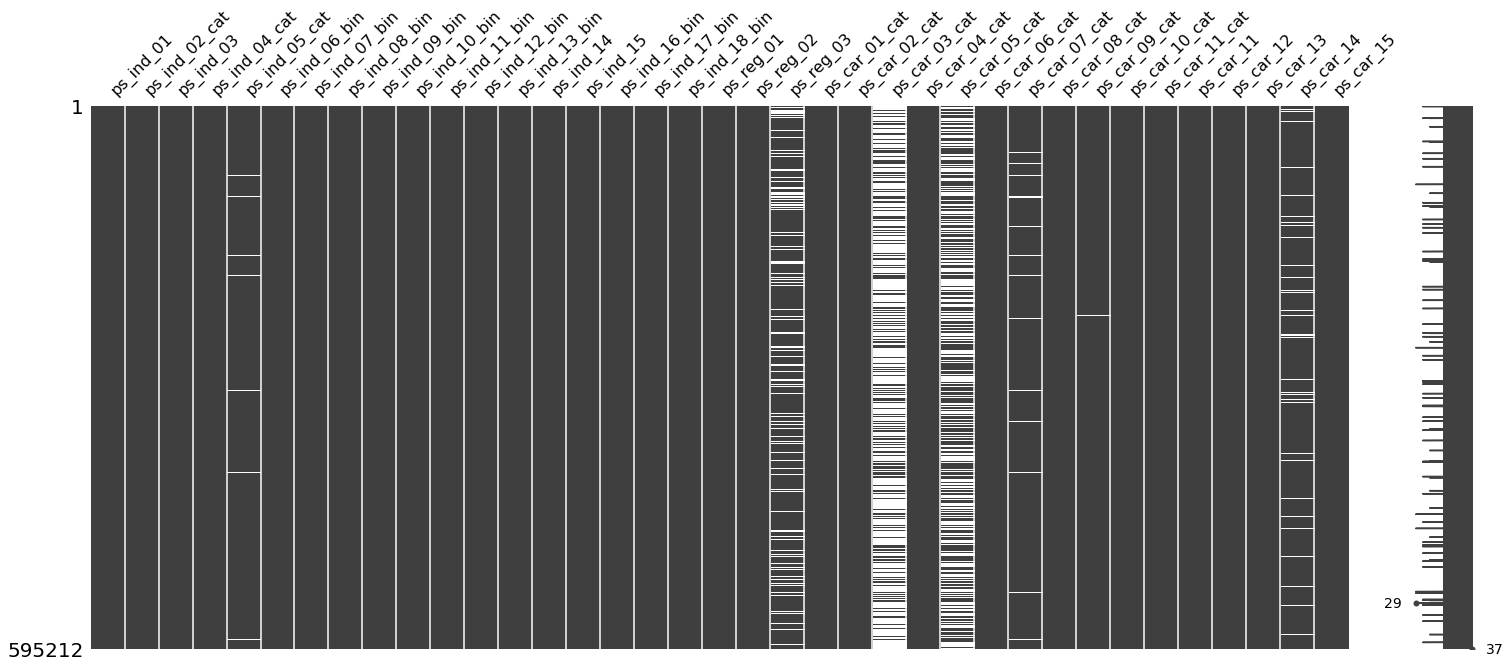

In [13]:
import missingno as mano
mano.matrix(df=train_copy.iloc[:,2:39])
#gives only for first 40 columns

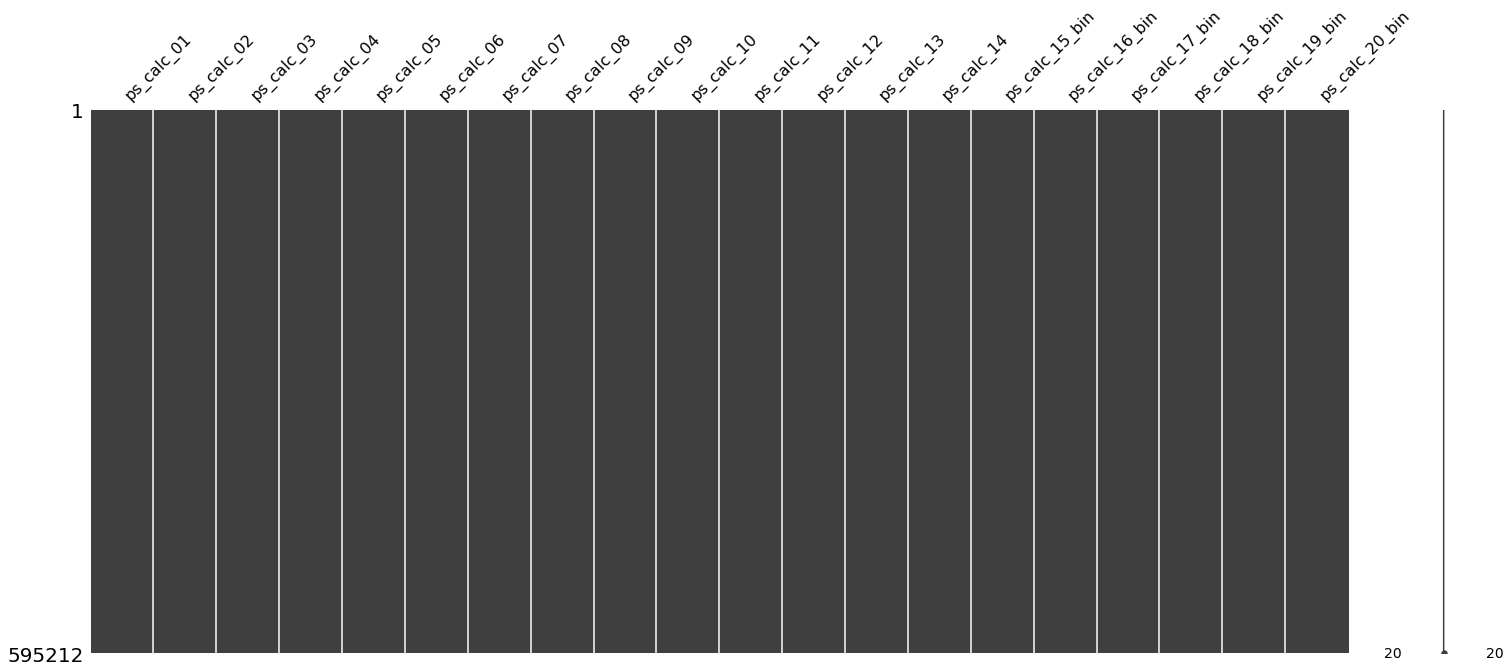

In [14]:
mano.matrix(df=train_copy.iloc[:,39:])

As it can be seen from the visualisation, where the white bands represents the null values, and black bands the filled values. It can be seen that there are 7 features out of total 59 features. They are:
* ps_ind_05_cat
* ps_reg_03
* ps_car_03_cat
* ps_car_05_cat
* ps_car_07_cat
* ps_car_09_cat
* ps_car_14

It is also very apparant that a big majority of missing values are missing from 3 columns (ps_reg_03 | ps_car_03_cat | ps_car_05_cat)

## 2.3 Target variable inspection

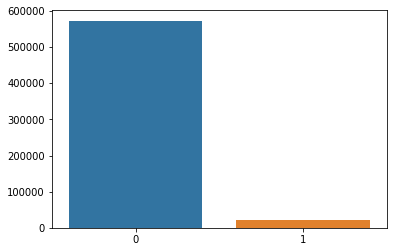

In [15]:
x = train['target'].value_counts().index.values
y = train['target'].value_counts().values

sns.barplot(x = x, y = y, data = train)

In [16]:
train['target'].value_counts() / train.shape[0]

0    0.963552
1    0.036448
Name: target, dtype: float64

From the plot and the percentage its clear that the target variable is imbalanced, 96% is represented by 0.

## 2.4 DataTypes check

This check is carried out to see what kind of datatypes the train set is compared of, to get the better oerview od the data that we are provided with. Using the counter method to gain all the dtypes.

In [17]:
Counter(train.dtypes.values)

Counter({dtype('int64'): 49, dtype('float64'): 10})

As alluded to above, there are 59 columns that make up the train data set and we can observe from this check that the features/clumns consist of only two datatypes = integer and float

In [18]:
train_float = train.select_dtypes(include=['float64'])
train_int = train.select_dtypes(include=['int64'])

## 2.5 Correlation plots

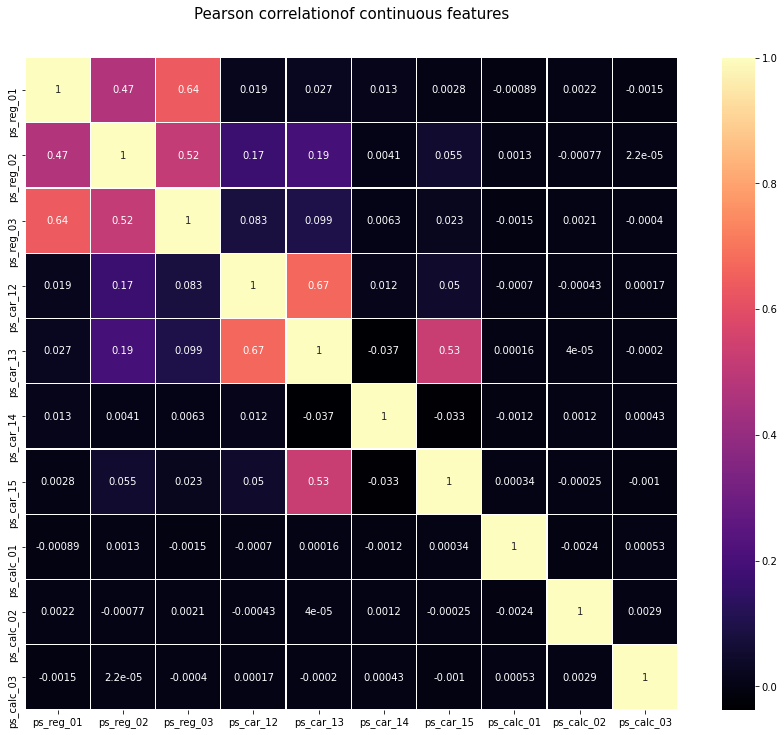

In [19]:
colormap = plt.cm.magma
plt.figure(figsize = (16,12))
plt.title('Pearson correlationof continuous features', y=1.05, size=15)
sns.heatmap(train_float.corr(), linewidth=0.1, vmax=1.0, square=True, cmap=colormap,linecolor='white', annot=True)

From the correlation plot, we can see that majority of features display 0 or no co-relation to one another. The paired features that display a positive linear correlation are as followed:
* ps_reg_01, ps_reg_03
* ps_reg_02, ps_reg_03
* ps_car_12, ps_car_13
* pas_car_13, pas_car_15

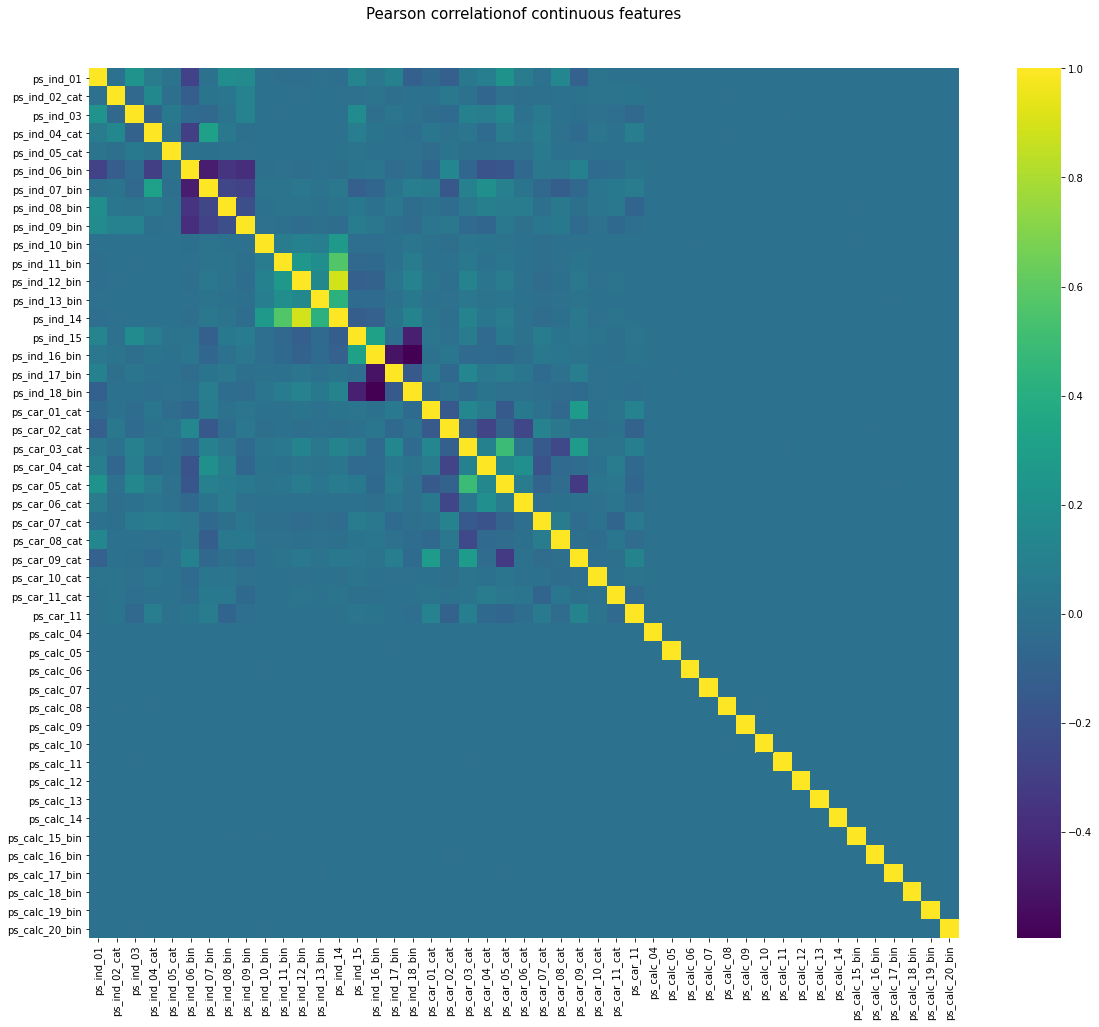

In [20]:
train_int = train_int.drop(['id', 'target'], axis=1)
colormap = plt.cm.viridis
plt.figure(figsize = (21,16))
plt.title('Pearson correlationof continuous features', y=1.05, size=15)
sns.heatmap(train_int.corr(), linewidth=0.1, vmax=1.0, square=True, cmap=colormap,linecolor=None, annot=False)

# data = [
#         go.Heatmap(
#             x = train_int.corr().values,
#             y = train_int.columns.values,
#             colorscale = 'Viridis', 
#             reversescale = False,
#             text = [True],
#             opacity = 1.0
#         )
# ]

# layout = go.Layout(
#     title = 'Pearson copprelation of int-type features',
#     xaxis = dict(ticks='', nticks=36),
#     yaxis = dict(ticks=''),
#     width = 900, height = 700)

# fig = go.Figure(data = data, layout=layout)
# py.iplot(fig, filename='labelled-heatmap')

Similarly, we can see that there are number of columns that are no linearly correlated with each other at all. Some of festures of interest are as follows:
* negatively correlated = ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin

Previously, as seen ps_car_03 and ps_car_05 had manu missing values, hence it would be no surprise to find them positively correlated, albeit one that may not really reflect the underlying truth for the data.

## 2.6 Mutual information plots

Usefool tool as it allows one to inspect the mutual info between the target variable and the corresponding features it is calculated against.

For classification problem, can conveniently call Sklearn's mutual_info_classif method which measures the dependency between two random variables an ranges from 0 (independent of each other) to higher values (indicating some dependency). This therefore will help us give an idea of how much information from the target may be contained within the features.

The Sklearn implementation of the method mutual_info_classif tells that it, "relies on non=parametric methods based on entropy estiation from k-nearest neighbors distances".

In [21]:
mf = mutual_info_classif(train_float.values, train.target.values, n_neighbors=3, random_state=4)
mf

array([0.01369439, 0.00465134, 0.00559503, 0.00839271, 0.00171765,
       0.0023005 , 0.01269902, 0.00564715, 0.00533472, 0.00514645])

In [22]:
mf_int = mutual_info_classif(train_int.values, train.target.values, n_neighbors=3, random_state=4)
mf_int

array([0.01466059, 0.06324398, 0.01250265, 0.02352022, 0.00237318,
       0.02202568, 0.00947715, 0.00359544, 0.00456181, 0.        ,
       0.        , 0.00023134, 0.        , 0.        , 0.01083523,
       0.06141591, 0.00243669, 0.00326848, 0.03260279, 0.0956335 ,
       0.07003978, 0.0040191 , 0.03907411, 0.01601337, 0.11723513,
       0.09588882, 0.07234439, 0.13194916, 0.00636552, 0.05750596,
       0.03207119, 0.03065232, 0.0288246 , 0.02458635, 0.02818939,
       0.02751736, 0.01239156, 0.01538143, 0.02641539, 0.02006424,
       0.01362895, 0.0019745 , 0.05432019, 0.0425514 , 0.01151005,
       0.01694999, 0.00319739])

## 2.7 Binary feature inspection

Inspecting columns that contain binary info

In [23]:
bin_col = [] 
for col in train.columns:
   if '_bin' in col:
     bin_col.append(col)
zero_list = []
one_list = []
for col in bin_col:
  zero_list.append((train[col]==0).sum())
  one_list.append((train[col]==1).sum())

In [24]:
trace1 = go.Bar(x = bin_col, y = zero_list, name = 'Zero count')
trace2 = go.Bar(x = bin_col, y = one_list, name = 'One count')

data = [trace1, trace2]

layout = go.Layout(barmode='stack', title = 'Count of 1 and 0 in binary variables')

fig = go.Figure(data=data, layout = layout)
py.iplot(fig, filename='Stacked-bar')

Here we observe that there are 4 features: ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_bin_13 which are completely dominated by zeroes. This begs the question whether the features are useful at all as they do not contain much information about the class vis-a-vis target. Putting this features into model might lead to overfitting of the model.

It can be observed that columns ps_ind_02_cat, ps_car_10_cat have only 1 values, which might again be skewed for the prediction. Similarly columns ps_car_01_cat and ps_car_11_cat have very small counts of either 0 or 1. 

## 3. Feature importance by Random Forrest

Fitting the training data with a Random Forrest Classifier and looking at the ranking of the features after the model has finished training.

This is a quick way of using an ensemble model(weak decision tree learners applied under bootstrap aggregated) which does not require much parameter tuning in obtaining useful features importances and is also robust to target imbalances.

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=150, max_depth=8, min_samples_leaf=4,max_features=0.2, n_jobs=1, random_state=4)
rf.fit(train.drop(['id', 'target'], axis=1), train.target)
features = train.drop(['id', 'target'], axis=1).columns.values

## 3.1 Scatter plot of feature importance

Having trained the model, we can obtain the list of important features by invoking the atribute 'feature_importances_' and plot it

In [26]:
trace = go.Scatter(y = rf.feature_importances_, 
                   x = features, mode = 'markers', 
                   marker = dict(sizemode = 'diameter', sizeref=1, size=13, color=rf.feature_importances_, colorscale = 'Portland', showscale = True),
                   text = features
    )

data = [trace]

layout = go.Layout(
    autosize = True,
    title = 'Random Forest Feature Importance',
    hovermode = 'closest',
    xaxis = dict(ticklen = 5, showgrid = False, zeroline = False, showline = False),
    yaxis = dict(title = 'Feature Importance', ticklen = 2, gridwidth = 2, showgrid = False, zeroline = False),
    showlegend = False,
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename = 'scatter2010')

## 3.2 Barplot

In [27]:
#displaying a sorted list of all the features ranked by order of their importance, from highest to lowest

x,y = (list(x) for x in zip(*sorted(zip(rf.feature_importances_, features), reverse=False)))

trace3 = go.Bar(
    x=x,
    y=y, 
    marker = dict(color = x, colorscale = 'Viridis', reversescale = True),
    name = 'Random Forest Feature Importance', 
    orientation = 'h'
)

layout = dict(
    title = 'Barplot of feature importance',
    width = 900, 
    height = 2000,
    yaxis = dict(showgrid=False, showline=False, showticklabels=True))

fig = go.Figure(data=[trace3])
fig['layout'].update(layout)
py.iplot(fig, filename='plots')

## 3.3 Decision Tree visualisation

Visualising the tree branches or decisions made by the model. It was fitted with max_depth of 3 and hence there will be three levels. Will export to graph visualisation attribute in sklearn 'export_grphviz' and then eport and import the tree image of visualization here.

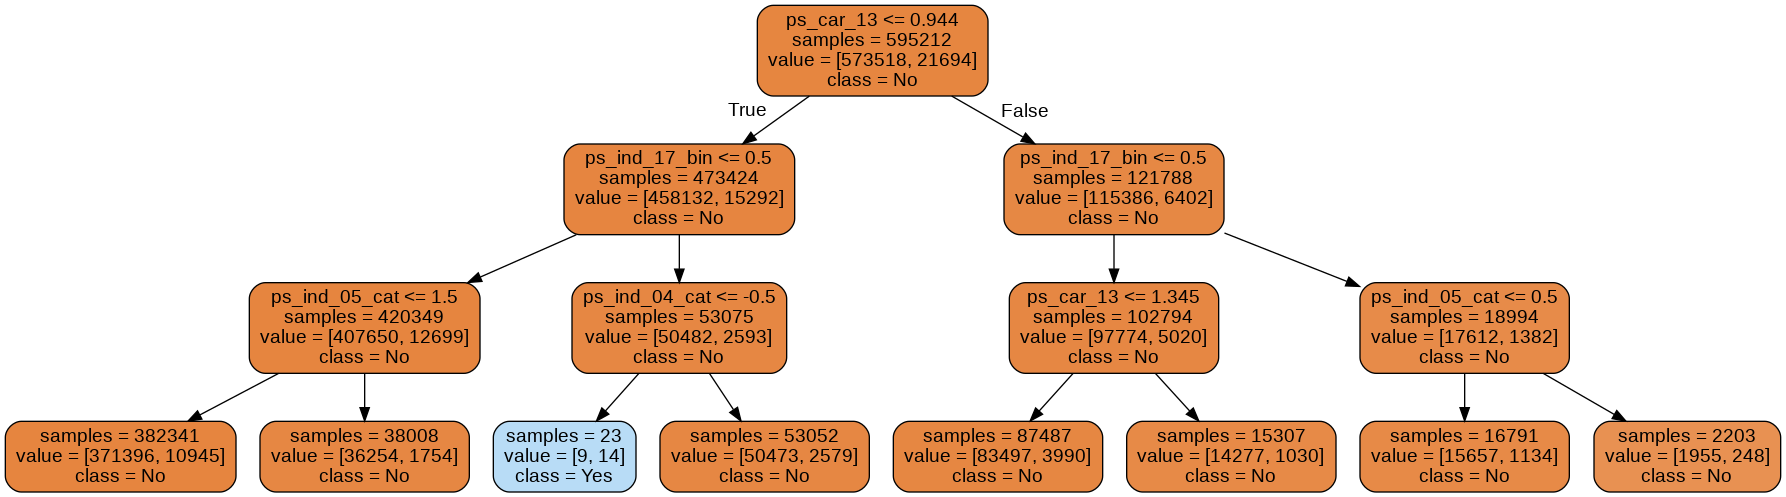

In [28]:
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import re 

decision_tree = tree.DecisionTreeClassifier(max_depth=3)
decision_tree.fit(train.drop(['id', 'target'], axis=1), train.target)

#exporting as .dot file
with open('tree.dot', 'w') as f:
  f = tree.export_graphviz(decision_tree,
                           out_file = f,
                           max_depth = 4,
                           impurity = False,
                           feature_names = train.drop(['id', 'target'], axis=1).columns.values,
                           class_names = ['No', 'Yes'],
                           rounded = True,
                           filled = True)
  
#convert .dot to .png
check_call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png'])

#annotating chart with PIL
img = Image.open('tree.png')
draw = ImageDraw.Draw(img)
img.save('sample_tree.png')
PImage('sample_tree.png',)

So the most important variables can e said are: ps_car_13, ps_ind_17_bin, ps_ind_05_cat, ps_ind_04_cat and ps_car_13

# 4. Feature importance via Gradient boosting model

It proceeds in a forward stage-wise fashion, where at each stage regression trees are fitted on the gradient of the loss function(which defaults to deviance in Sklearn implementation).

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators =100, max_depth = 3, min_samples_leaf=4, max_features=0.2, random_state=4)
gb.fit(train.drop(['id', 'target'], axis=1), train.target)
features = train.drop(['id', 'target'], axis=1).columns.values

## 4.1 Scatterplot 

In [30]:
trace = go.Scatter(y = gb.feature_importances_, 
                   x = features, mode = 'markers', 
                   marker = dict(sizemode = 'diameter', sizeref=1, size=13, color=gb.feature_importances_, colorscale = 'Portland', showscale = True),
                   text = features
    )

data = [trace]

layout = go.Layout(
    autosize = True,
    title = 'Gradient Boosting Feature Importance',
    hovermode = 'closest',
    xaxis = dict(ticklen = 5, showgrid = False, zeroline = False, showline = False),
    yaxis = dict(title = 'Feature Importance', ticklen = 2, gridwidth = 2, showgrid = False, zeroline = False),
    showlegend = False,
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename = 'scatter2010')

The graph almost looks similar to that of Random forest except for some columns.

## 4.2 Barplot

In [31]:
#displaying a sorted list of all the features ranked by order of their importance, from highest to lowest

x,y = (list(x) for x in zip(*sorted(zip(gb.feature_importances_, features), reverse=False)))

trace4 = go.Bar(
    x=x,
    y=y, 
    marker = dict(color = x, colorscale = 'Viridis', reversescale = True),
    name = 'Gradient Boosted Feature Importance', 
    orientation = 'h'
)

layout = dict(
    title = 'Barplot of feature importance',
    width = 900, 
    height = 2000,
    yaxis = dict(showgrid=False, showline=False, showticklabels=True))

fig = go.Figure(data=[trace4])
fig['layout'].update(layout)
py.iplot(fig, filename='plots')

Interestingly, have observed that in both Random Forest and Gradient Boosting algorithms. both the models picked out the column: ps_car_13

# 5. PCA 

Heps us in knowing whether our data is complex or not.
Following is the link where you can find the noteboo and well explained
https://www.kaggle.com/tilii7/dimensionality-reduction-pca-tsne/notebook

Eg: Suppose you have data of n-dimensional space and throwing it in 2-d space, if your data is linearly seperable, the dat will be properly segregated, but if it is not then wont be able to segregate the data, meaning, will be hard to find the patterns and trends from the data.

In [32]:
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    %matplotlib inline
    import matplotlib.cm as cm
    from sklearn.decomposition import PCA
    from sklearn.manifold import TSNE
    

In [33]:
print('\nLoading files ...')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
X = train.drop(['id', 'target'], axis=1).values
y = train['target'].values.astype(np.int8)
target_names = np.unique(y)
print('\nThere are %d unique target valuess in this dataset:' % (len(target_names)), target_names)


Loading files ...

There are 2 unique target valuess in this dataset: [0 1]


Principal Component Analysis (PCA) identifies the combination of components (directions in the feature space) that account for the most variance in the data.

In [34]:
from sklearn.preprocessing import MinMaxScaler

def scale_data(X, scaler=None):
    if not scaler:
        scaler = MinMaxScaler(feature_range=(-1, 1))
        scaler.fit(X)
    X = scaler.transform(X)
    return X, scaler

X = train.drop(['id', 'target'], axis=1)
test.drop(['id'], axis=1, inplace=True)
n_train = X.shape[0]
train_test = pd.concat((X, test)).reset_index(drop=True)
col_to_drop = X.columns[X.columns.str.endswith('_cat')]
col_to_dummify = X.columns[X.columns.str.endswith('_cat')].astype(str).tolist()

for col in col_to_dummify:
    dummy = pd.get_dummies(train_test[col].astype('category'))
    columns = dummy.columns.astype(str).tolist()
    columns = [col + '_' + w for w in columns]
    dummy.columns = columns
    train_test = pd.concat((train_test, dummy), axis=1)

train_test.drop(col_to_dummify, axis=1, inplace=True)
train_test_scaled, scaler = scale_data(train_test)
X = np.array(train_test_scaled[:n_train, :])
test = np.array(train_test_scaled[n_train:, :])
print('\n Shape of processed train data:', X.shape)
print(' Shape of processed test data:', test.shape)



 Shape of processed train data: (595212, 227)
 Shape of processed test data: (892816, 227)


In [35]:
print('\nRunning PCA again ...')
pca = PCA(n_components=n_comp, svd_solver='full', random_state=1001)
X_pca = pca.fit_transform(X)
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

print('Individual variance contributions:')
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])

plt.figure(1, figsize=(10, 10))

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, s=1,
                alpha=.8, label=target_name, marker='.')
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.title(
        "Scatter plot of the training data projected on the 1st "
        "and 2nd principal components")
plt.xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[0] * 100.0))
plt.ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[1] * 100.0))

plt.savefig('pca-porto-02.png', dpi=150)
plt.show()


Running PCA again ...


NameError: ignored

I think that's a better plot visually and there is a good number of well-defined clusters, but still no clear separation between 0/1 points.

t-SNE could potentially lead to better data separation/visualization, because unlike PCA it preserves the local structure of data points. The problem with sklearn implementation of t-SNE is its lack of memory optimization.

Run at your risk the beloe code 

In [ ]:
# tsne = TSNE(n_components=2, init='pca', random_state=1001, perplexity=30, method='barnes_hut', n_iter=1000, verbose=1)
# X_tsne = tsne.fit_transform(X) # this will either fail or take a while (most likely overnight)

# plt.figure(2, figsize=(10, 10))

# for color, i, target_name in zip(colors, [0, 1], target_names):
#     plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], color=color, s=1,
#                 alpha=.8, label=target_name, marker='.')
# plt.legend(loc='best', shadow=False, scatterpoints=3)
# plt.title('Scatter plot of t-SNE embedding')
# plt.xlabel('X')
# plt.ylabel('Y')

# plt.savefig('t-SNE-porto-01.png', dpi=150)
# plt.show()